In [25]:
from fastai.vision import *

In [26]:
folder='Real-Donald-Trump'
path=Path('data')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [27]:
folder='Donald-Trump-Impersonation'
path=Path('data')
dest=path/folder
dest.mkdir(parents=True,exist_ok=True)

In [28]:
path.ls()

[PosixPath('data/Donald-Trump-Impersonation-Audio'),
 PosixPath('data/fake-speech-detection'),
 PosixPath('data/Donald-Trump-Impersonation'),
 PosixPath('data/Real-Donald-Trump'),
 PosixPath('data/Real-Donald-Trump-Audio')]

In [29]:
classes=['Real-Donald-Trump','Donald-Trump-Impersonation']

In [30]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

Real-Donald-Trump


Donald-Trump-Impersonation


In [31]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=128, num_workers=4).normalize(imagenet_stats)

In [32]:
data.classes

['Donald-Trump-Impersonation', 'Real-Donald-Trump']

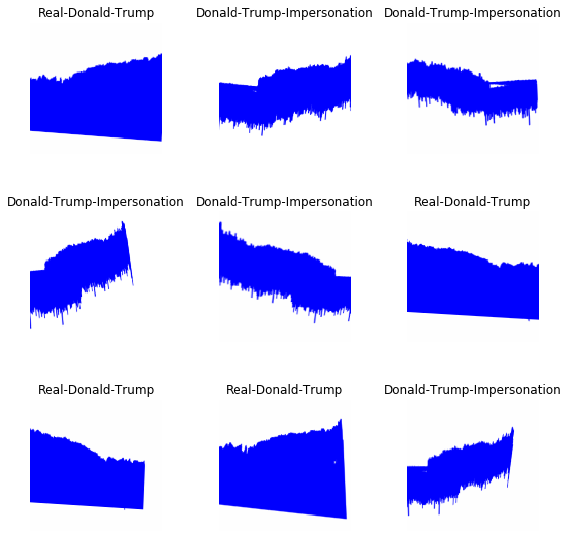

In [33]:
data.show_batch(rows=3,figsize=(8,8))


In [34]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)


(['Donald-Trump-Impersonation', 'Real-Donald-Trump'], 2, 253, 63)

In [35]:
#Train model = resnet50
learn=cnn_learner(data,models.resnet50,metrics=error_rate)


In [36]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.721177,0.449395,0.222222,00:04
1,0.471203,0.121371,0.015873,00:01
2,0.328597,0.056923,0.015873,00:01
3,0.269930,0.256070,0.095238,00:01
4,0.256202,0.154685,0.015873,00:01


In [37]:
learn.save('stage-1')

In [38]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


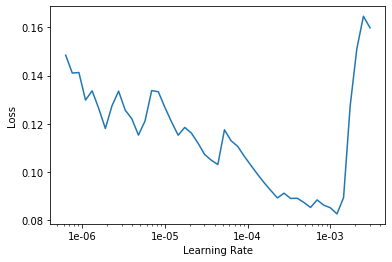

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(20,max_lr=slice(5e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.167462,0.133593,0.031746,00:01
1,0.103480,0.048499,0.031746,00:01
2,0.072652,0.022823,0.015873,00:01
3,0.057213,0.002096,0.000000,00:02
4,0.050617,0.251221,0.095238,00:01
5,0.042463,0.366074,0.111111,00:01
6,0.037490,0.126920,0.047619,00:01
7,0.061338,0.126436,0.031746,00:01
8,0.059230,0.000077,0.000000,00:01
9,0.055660,0.000134,0.000000,00:01


In [42]:
learn.save('stage-2')

In [43]:
learn.load('stage-2')


Learner(data=ImageDataBunch;

Train: LabelList (253 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Donald-Trump-Impersonation,Donald-Trump-Impersonation,Donald-Trump-Impersonation,Donald-Trump-Impersonation,Donald-Trump-Impersonation
Path: data;

Valid: LabelList (63 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Real-Donald-Trump,Donald-Trump-Impersonation,Real-Donald-Trump,Donald-Trump-Impersonation,Donald-Trump-Impersonation
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottlenec

In [44]:
interp=ClassificationInterpretation.from_learner(learn)


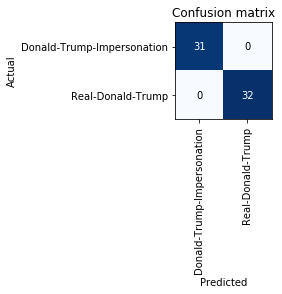

In [45]:
interp.plot_confusion_matrix()

In [47]:
learn.export()